# 18 feb  Web API 

Question 1: What is an API? Give an example, where an API is used in real life.

In [5]:
%pip install requests


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import requests

ticker = 'SBIN.BSE'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol='+ ticker +'&apikey=HZ8QGOLXW2U01N2E'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'SBIN.BSE', '3. Last Refreshed': '2023-04-28', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-04-28': {'1. open': '565.55', '2. high': '580.0', '3. low': '565.55', '4. close': '578.05', '5. adjusted close': '578.05', '6. volume': '878199', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-04-27': {'1. open': '564.1', '2. high': '567.3', '3. low': '561.25', '4. close': '564.95', '5. adjusted close': '564.95', '6. volume': '268175', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-04-26': {'1. open': '562.1', '2. high': '567.0', '3. low': '556.4', '4. close': '566.3', '5. adjusted close': '566.3', '6. volume': '302034', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-04-25': {'1. open': '555.0', '2. high': '568.0', '3. low': '554.55', '4. close': '561.65', '5. adjusted close': '561.65',

In [2]:
# Getting dates from Time Series Daily
dates = list(data['Time Series (Daily)'].keys())
dates[0:5]

['2023-04-28', '2023-04-27', '2023-04-26', '2023-04-25', '2023-04-24']

In [3]:
prices = list(data['Time Series (Daily)'].values())
prices[0:2]

[{'1. open': '565.55',
  '2. high': '580.0',
  '3. low': '565.55',
  '4. close': '578.05',
  '5. adjusted close': '578.05',
  '6. volume': '878199',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 {'1. open': '564.1',
  '2. high': '567.3',
  '3. low': '561.25',
  '4. close': '564.95',
  '5. adjusted close': '564.95',
  '6. volume': '268175',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'}]

In [4]:
open = []
high = []
low = []
close = []
adj_close = []
volume = []
for i in prices:
    open.append(float(i['1. open']))
    high.append(float(i['2. high']))
    low.append(float(i['3. low']))
    close.append(float(i['4. close']))
    adj_close.append(float(i['5. adjusted close']))
    volume.append(float(i['6. volume']))
# Saving into Dataframe
import pandas as pd
df_sbin = pd.DataFrame({'open':open,'high':high, 'low':low, 'close':close,'adj_close':adj_close, 'volume':volume})
df_sbin.index = dates
df_sbin = df_sbin.iloc[::-1]

In [5]:
df_sbin.head()


,open,high,low,close,adj_close,volume
2022-12-05,605.05,618.0,605.05,617.15,617.15,585041.0
2022-12-06,614.70,619.8,608.00,609.00,609.00,298737.0
2022-12-07,610.10,612.9,604.70,607.00,607.00,346921.0
2022-12-08,610.00,613.9,607.30,611.70,611.70,379325.0
2022-12-09,614.00,618.0,609.00,616.45,616.45,628573.0


In [6]:
df_sbin.tail()


,open,high,low,close,adj_close,volume
2023-04-24,542.95,555.5,542.95,554.55,554.55,512613.0
2023-04-25,555.00,568.0,554.55,561.65,561.65,655814.0
2023-04-26,562.10,567.0,556.40,566.30,566.30,302034.0
2023-04-27,564.10,567.3,561.25,564.95,564.95,268175.0
2023-04-28,565.55,580.0,565.55,578.05,578.05,878199.0


In [7]:
df_sbin.shape


(100, 6)

In [8]:
## Saving Data to csv file
df_sbin.to_csv('SBIN.csv',index=True)

<Axes: title={'center': 'SBIN (BSE) Close price'}>

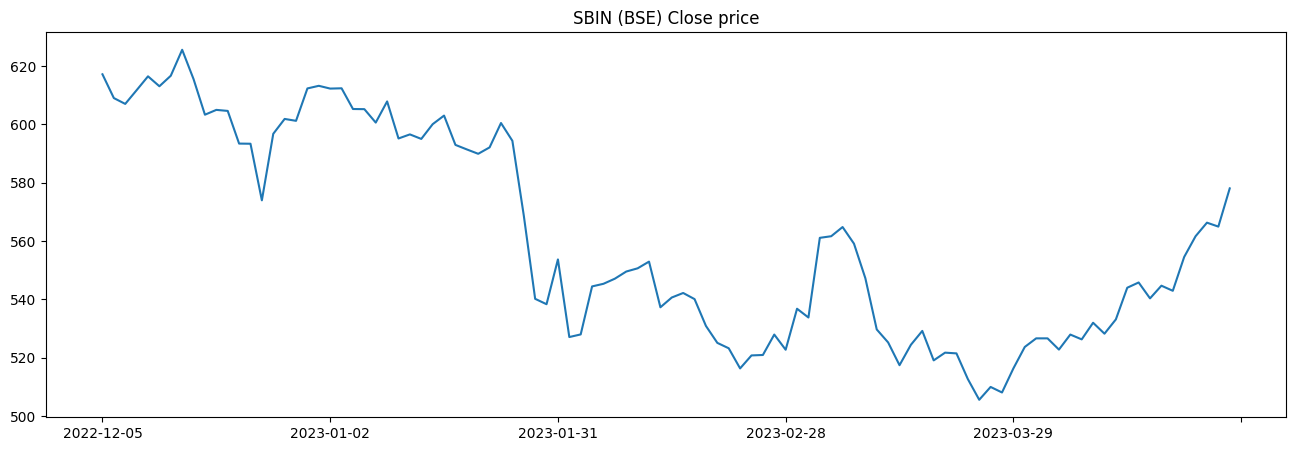

In [9]:
# Plotting close value of SBI from BSE
df_sbin['close'].plot(kind='line',figsize=(16,5),title='SBIN (BSE) Close price')

In [10]:
# This is used to find ticker symbol for reliance in alpha vantege
import requests

search_query = "reliance"

url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords='+search_query+'&apikey=HZ8QGOLXW2U01N2E'
r = requests.get(url)
data = r.json()

print(data)

{'bestMatches': [{'1. symbol': 'RELIANCE.BSE', '2. name': 'RELIANCE INDUSTRIES LTD.', '3. type': 'Equity', '4. region': 'India/Bombay', '5. marketOpen': '09:15', '6. marketClose': '15:30', '7. timezone': 'UTC+5.5', '8. currency': 'INR', '9. matchScore': '0.8421'}, {'1. symbol': 'RELI', '2. name': 'Reliance Global Group Inc', '3. type': 'Equity', '4. region': 'United States', '5. marketOpen': '09:30', '6. marketClose': '16:00', '7. timezone': 'UTC-04', '8. currency': 'USD', '9. matchScore': '0.6667'}, {'1. symbol': 'RELIW', '2. name': 'Reliance Global Group Inc - Warrants - Series A (01/02/2026)', '3. type': 'Equity', '4. region': 'United States', '5. marketOpen': '09:30', '6. marketClose': '16:00', '7. timezone': 'UTC-04', '8. currency': 'USD', '9. matchScore': '0.6154'}, {'1. symbol': 'RELCAPITAL.BSE', '2. name': 'RELIANCE CAPITAL LTD.', '3. type': 'Equity', '4. region': 'India/Bombay', '5. marketOpen': '09:15', '6. marketClose': '15:30', '7. timezone': 'UTC+5.5', '8. currency': 'INR'

Question 2: Give advantages and disadvantages of using API.
Answer :
Advantages of using API:
Interoperability: APIs enable different software systems to interact with each other seamlessly, regardless of their underlying technologies or programming languages. This allows for greater interoperability between systems and can lead to more efficient and effective software development.

Flexibility: APIs allow developers to create applications that are flexible and customizable. Developers can choose the specific functionality they need from an API and incorporate it into their applications, rather than building that functionality from scratch.

Time and cost savings: APIs can save time and money for developers and organizations by providing ready-made solutions that can be easily integrated into existing systems. This can reduce the amount of time and resources needed to build new software applications.

Innovation: APIs can spur innovation by allowing developers to create new applications that integrate with existing systems. This can lead to the development of new products and services that might not have been possible without APIs.

Disadvantages of using API:
Complexity: APIs can be complex to use and require technical expertise to implement and maintain. This can make it challenging for non-technical users to integrate with them.

Security Risks: APIs can introduce security risks, such as data breaches or unauthorized access to sensitive data, if not implemented properly or if security protocols are not followed.

Dependency: When an application relies heavily on a third-party API, it can create a dependency on that API. Any changes or disruptions to the API can have a significant impact on the application, leading to downtime or other issues.

Limited functionality: APIs may not always provide all the functionality needed for a particular application. In such cases, developers may need to build custom solutions, which can be time-consuming and costly.

Overall, APIs offer significant advantages for software development and integration, but it's important to consider the potential drawbacks and risks associated with their use. Developers should carefully evaluate the pros and cons of using APIs and choose the best approach for their particular needs.


Question 3

Question 3: What is a Web API? Differentiate between API and Web API.
Answer :
A Web API, also known as a web service, is a type of API that is accessed over the web using HTTP requests and responses. Web APIs allow applications to exchange data with web servers and access resources such as databases, file systems, or other services.
The main difference between an API and a Web API is that APIs can be accessed through different channels, including desktop applications, mobile apps, and embedded systems, whereas Web APIs are specifically designed to be accessed over the web using HTTP.
Another difference is that Web APIs often use standard web technologies such as REST (Representational State Transfer) or SOAP (Simple Object Access Protocol) to exchange data between systems, while APIs may use a variety of communication protocols and data formats depending on their design.
Differences between API and Web API are as per below:
Features	API	Web API
Access	Can be accessed through various channels, including desktop applications, mobile apps, and embedded systems	Specifically designed to be accessed over the web using HTTP
Protocol	May use different communication protocols and data formats depending on their design	Typically use standard web technologies such as REST or SOAP
Resource	Can provide access to various types of services and resources, such as operating system functions, hardware devices, or databases	Provide access to web-based services and resources such as databases, file systems, or other web services
Integration	Can be integrated with a wide range of software systems and applications	Often integrated with web-based software systems and applications
Security	Security protocols can vary depending on the design and implementation of the API	Typically use standard web security protocols such as OAuth or SSL/TLS
Examples	Operating system APIs, hardware APIs, database APIs, etc.	AlphaVantage API, Google Maps API, Twitter API, Facebook API, etc.

Question 4

Question 4: Explain REST and SOAP Architecture. Mention shortcomings of SOAP.
Answer :
REST and SOAP are two different architectural styles for designing web services.
REST (Representational State Transfer) is an architectural style that emphasizes the use of HTTP methods and resource URIs (Uniform Resource Identifiers) to represent and manipulate web resources. RESTful APIs typically use standard HTTP methods such as GET, POST, PUT, and DELETE to retrieve, create, update, and delete resources. REST is lightweight and scalable, and can be easily implemented using simple HTTP protocols.

SOAP (Simple Object Access Protocol), on the other hand, is a protocol that defines a standard format for exchanging structured data between applications over the internet. SOAP relies on XML (Extensible Markup Language) as its messaging format, and typically uses the HTTP or SMTP (Simple Mail Transfer Protocol) protocols for communication. SOAP is highly structured and can be used for complex operations, but can also be more cumbersome to implement and use than RESTful APIs.

Shortcomings of SOAP
One of the main shortcomings of SOAP is its complexity. SOAP relies on a complex XML schema that can be difficult to read and understand, and the protocol itself can be cumbersome to implement and use. SOAP also tends to be more resource-intensive than RESTful APIs, which can make it less suitable for high-volume or low-bandwidth environments.

Additionally, SOAP can be less flexible than REST, as it requires a strict adherence to a predefined interface and message format. This can make it difficult to customize or extend SOAP-based APIs to suit specific use cases or applications.

REST vs SOAP Analogy

Credits for above image : Upwork


Question 5

Question 5: Differentiate between REST and SOAP.
Answer :
Difference between REST and SOAP As below:
Feature	REST	SOAP
Protocol	Uses HTTP	Can use HTTP, SMTP, and others
Data format	Typically uses JSON or XML	Always uses XML
Communication style	Stateless, each request contains all information needed	Can be stateful or stateless
Message structure	Doesn't define a specific message structure	Has a standardized message structure defined by XML schema
Performance	Generally faster and more lightweight	Can be more resource-intensive and slower
Flexibility	Generally more flexible	Often more rigid and requires more planning and design
Overall, the choice between REST and SOAP depends on the specific needs of the application or service being developed. REST is often preferred for smaller, high-performance applications with a smaller data footprint, while SOAP may be more appropriate for larger, enterprise-level applications that require more robust messaging capabilities.